In [ ]:
!pip3 install imutils


In [ ]:
import cv2
import imutils
import imutils.perspective as persp
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
img_path='/content/'
os.chdir(img_path)
img=cv2.imread("/content/m78_m.jpg")
rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
#plt.imshow(rgb_img)
#plt.show()

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
rgb_img=cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
#plt.imshow(rgb_img)

In [ ]:
thresh,thresh_img=cv2.threshold(gray,110,255,cv2.THRESH_BINARY)
rgb_img=cv2.cvtColor(thresh_img,cv2.COLOR_BGR2RGB)
#plt.imshow(rgb_img)

In [ ]:
conts=cv2.findContours(thresh_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print("total conturs", len(conts))
conts= imutils.grab_contours(conts)
print("total conturs", len(conts))

total conturs 2
total conturs 1


In [ ]:
cont_img=np.zeros(img.shape)
#plt.imshow(cont_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


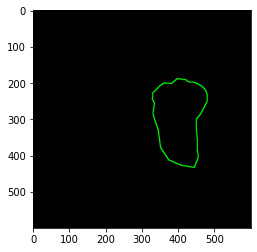

In [ ]:
cont_img=cv2.drawContours(cont_img,conts,-1,(0,255,0),2)
plt.imshow(cont_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


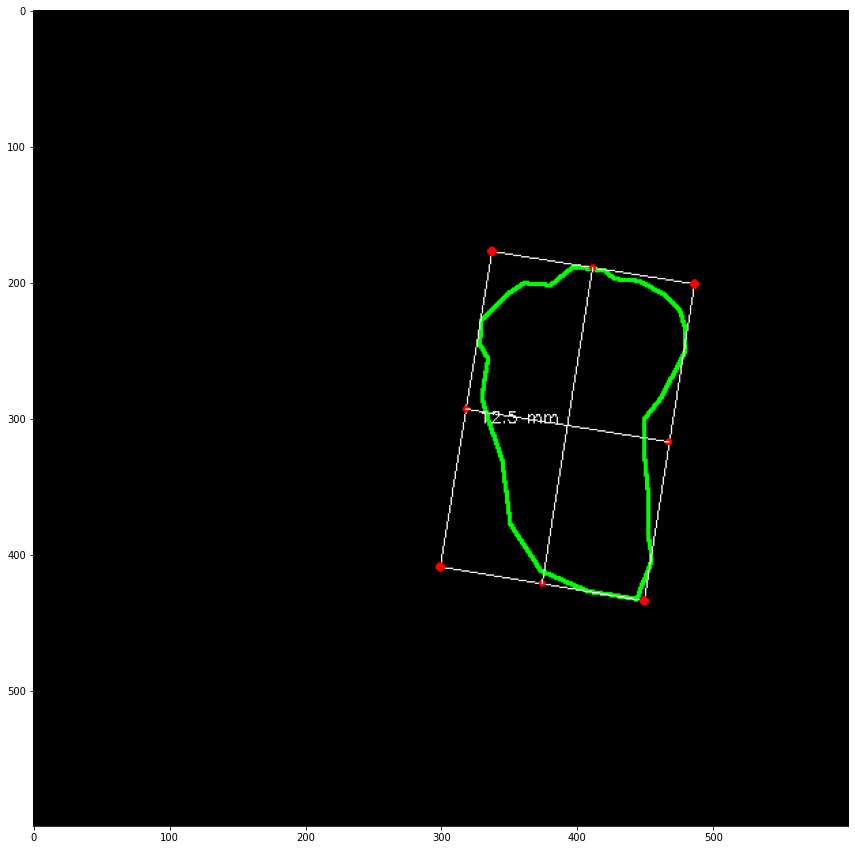

In [ ]:
cont_img=np.zeros(img.shape)
def midPoint(ptA,ptB):
  return ((ptA[0]+ptB[0])/2, (ptA[1]+ptB[1])/2)

for c in conts:
  box=cv2.minAreaRect(c)
  #print(box)
  box=cv2.boxPoints(box)
  box=np.array(box,dtype='int')

  if cv2.contourArea(c) < 900:
    continue

  cv2.drawContours(cont_img,[c],-1,(0,255,0),2)
  cv2.drawContours(cont_img,[box],-1,(255,255,255),1)

  #print(box)

  for (x,y) in box:
    #print(x,y)
    cv2.circle(cont_img,(x,y),2,(255,0,0),2)
    (tl,tr,br,bl)=box
#rigth-left
    (tlX,trX)= midPoint(tl,tr)
    (brX,blX)= midPoint(br,bl)

    cv2.circle(cont_img,(int(tlX),int(trX)),1,(255,0,0),2)
    cv2.circle(cont_img,(int(brX),int(blX)),1,(255,0,0),2) 
 #connect mid points using line 
    cv2.line(cont_img,(int(tlX),int(trX)),(int(brX),int(blX)),(255,255,255),1)   

    #calculate the distance on the midpoints

dA=dist.euclidean((tlX,trX),(brX,blX))

#cv2.putText(cont_img, "{:.1f} mm".format(dA*0.08221083073205848),(int(tlX-10),int(trX-10)), cv2.FONT_HERSHEY_SIMPLEX,0.4,(255,255,255),1)
#top-bottom
(tlX,trX)= midPoint(tl, bl)
(brX,blX)= midPoint(tr,br)

cv2.circle(cont_img,(int(tlX),int(trX)),1,(255,0,0),2)
cv2.circle(cont_img,(int(brX),int(blX)),1,(255,0,0),2) 

 #connect mid points using line 
cv2.line(cont_img,(int(tlX),int(trX)),(int(brX),int(blX)),(255,255,255),1)


#calculate the distance on the midpoints

dB=dist.euclidean((tlX,trX),(brX,blX))

#print size on pix on each conture rectangel 

cv2.putText(cont_img, "{:.1f} mm".format(dB*0.08221083073205848),(int(brX+10),int(blX+10)), cv2.FONT_HERSHEY_SIMPLEX,0.4,(255,255,255),1)


plt.figure(figsize=(15,15))
plt.imshow(cont_img)
plt.show()
